PROBLEMA:

Na empresa Ponta Grossa Ambiental, temos uma frota de 22 caminhões que realizam a Coleta Domiciliar de nossa cidade, sendo que, diariamente são realizados dois turnos de coleta (Diurno e Noturno), onde são coletadas por volta de 350 ton de resíduos/dia.
A logística de coleta dá-se da seguinte forma: 

- A cidade é dividida em 67 setores de coleta;
- Temos duas frequências de coleta: SEG, QUA, SEX e TER, QUI, SAB;
- Temos dois turnos de coleta: DIURNO e NOTURNO;

Dito isso, nota-se que operamos com efetivo apertado, com poucos (às vezes nenhum) caminhão disponível para troca ou auxílio, o que torna a busca por eficiência de coleta o ponto chave da nossa operação. Entretanto, no afã de coletar a maior quantidade de resíduos no menor tempo possível, nossas equipes de coleta optam por preencher o caminhão até o máximo que o espaço compactador permite, muitas vezes ultrapassando o limite de peso máximo especificado pelo fabricante dos caminhões, atitude que denominamos ESTOURO DE PESO. 

Essa atitude traz inúmeros problemas ao veículo, imediatos e futuros, sendo os principais e mais evidentes:

- Desgaste das molas de amortecimento;
- Desgaste acelerado dos pneus;
- Comprometimento da estrutura - pois não foi feita para suportar toneladas a mais;
- Esforço excessivo do motor do veículo que está carregando mais peso que o estipulado;
- Compactador de resíduos comprometido pelo excesso de uso;
- Segurança - um caminhão com peso acima do limite implica em maior dificuldade de manobra e maior risco de tombamento;

Diante deste cenário, no início do ano passado implementamos um indicador de estouros de peso, visando quantificar todas as ocorrências para um melhor monitoramento. 
Nesse relatório, observamos a data do ocorrido, o peso total recolhido no dia, a quilometragem de coleta realizada no dia, a razão de coleta (Peso / Km), dia da semana e quantidade de estouros de peso que ocorreu no dia (Coluna: ACIMA). Após análise com auxílio de visualizações gráficas, percebemos que há uma relação linear entre as variáveis Km Total, Peso Total, Dia da Semana e a quantidade de estouros de peso que ocorrem no dia.

Pensando nisso, este trabalho consiste na aplicação do algoritmo de Regressão Linear com múltiplas variáveis para prever a quantidade de estouros de peso em um determinado dia baseado na quilometragem total que será rodada (Km), o peso estimado a ser coletado (Kg) e o dia da semana que será realizado (DDS).


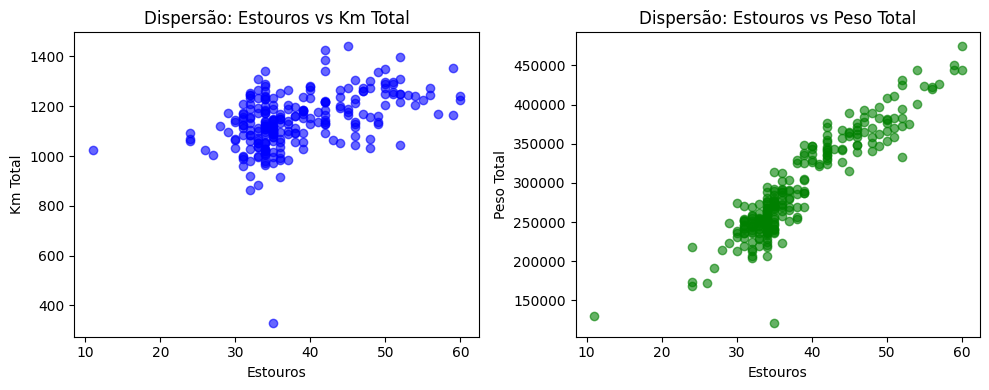

In [74]:
# Análise exploratória de dados com gráficos de dispersão
# Este script lê um arquivo CSV (teste final 2.csv) e cria gráficos de dispersão para analisar a relação entre variáveis.

import pandas as pd
import matplotlib.pyplot as plt

dados = pd.read_csv('teste final 2.csv')
df = pd.DataFrame(dados)

# Gráfico 1: Estouros vs Km Total
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['ACIMA'], df['Km Total'], color='blue', alpha=0.6)
plt.xlabel('Estouros')
plt.ylabel('Km Total')
plt.title('Dispersão: Estouros vs Km Total')

# Gráfico 2: Estouros vs Peso Total
plt.subplot(1, 2, 2)
plt.scatter(df['ACIMA'], df[' Peso Total'], color='green', alpha=0.6)
plt.xlabel('Estouros')
plt.ylabel('Peso Total')
plt.title('Dispersão: Estouros vs Peso Total')

plt.tight_layout()
plt.show()

SAÍDA:

Análise exploratória para investigar a relação entre as variáveis.

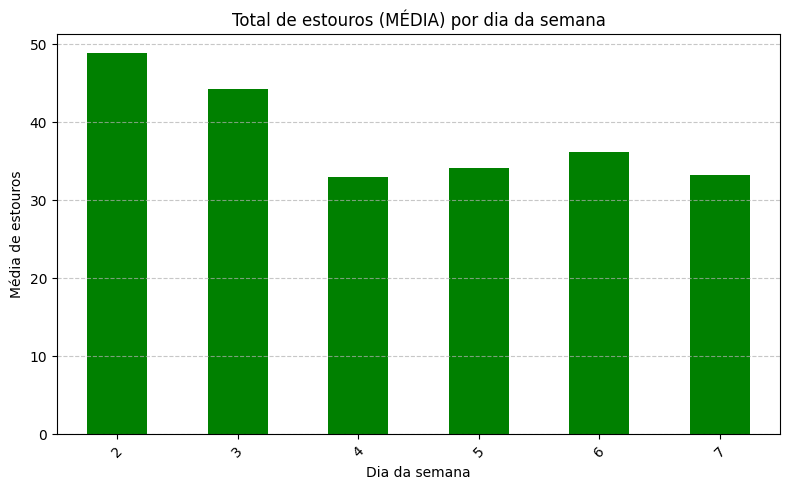

In [75]:
# Análise de dados por dia da semana

import matplotlib.pyplot as plt

# Gráfico 3: Média de estouros por dia da semana

total_por_dia = df.groupby('DDS')['ACIMA'].mean()

plt.figure(figsize=(8,5))
total_por_dia.plot(kind='bar', color='green')
plt.title('Total de estouros (MÉDIA) por dia da semana')
plt.ylabel('Média de estouros')
plt.xlabel('Dia da semana')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


SAÍDA:

O gráfico acima nos auxilia no entendimento da distribuição de ocorrências de estouros de peso ao longo dos dias da semana.

2 -> Segunda-Feira

3 -> Terça-Feira

4 -> Quarta-Feira

5 -> Quinta-Feira

6 -> Sexta-Feira

7 -> Sábado

Por conta do maior volume de resídos ser coletado nas segundas e terças, a média de estouros é maior nestes dias. Entretanto, a média se mantém alta também no restante da semana, o que indica que o problema está enraizado na operação.

In [76]:
# Análise de regressão linear para prever estouros com base em Km Total, Peso Total e DDS

import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

dados = pd.read_csv('teste final 2.csv')
df = pd.DataFrame(dados)

X = df[['Km Total',' Peso Total', 'DDS']]
y = df['ACIMA']

# Utilizando Pipeline para normalizar os dados e aplicar Regressão Linear
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('model', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)


# Cálculo de métricas de erro
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 2.07
MSE: 6.85
RMSE: 2.62
R²: 0.89


SAÍDA: 

MSE = 6.85

- Em média, o quadrado do erro entre o valor real e o previsto é 6.85. Isso significa que os erros grandes são penalizados, mas a unidade está ao quadrado, dificultando uma interpretação direta. Em uma escala de ocorrências que variam de 0~50, indica uma boa acurácia e uma taxa de erro em torno de 10%, aceitável em termos da nossa operação. 

RMSE = 2.62

- Essa é a raiz quadrada do MSE e tem a mesma unidade da variável alvo. Isso mostra que, considerando os erros quadráticos, a média dos erros é cerca de 2.62 unidades, indicando que grandes erros têm um impacto maior que no MAE.

MAE = 2.07

- Em média, o modelo erra a previsão por cerca de 2.07 unidades da variável Estouros - ACIMA.

R² = 0.89

- O modelo explica 89% da variabilidade dos dados de Estouro. Isso é um resultado bom, indicando que o modelo captura o comportamento da variável alvo, mais uma vez trabalhando com os +-10% aceitos para nossa operação.

In [77]:
# Previsão de estouros para uma nova entrada

nova_entrada = pd.DataFrame({
    'Km Total': [300],
    ' Peso Total': [8684],
    'DDS': [5]  
})

previsao = pipeline.predict(nova_entrada)

print(f'Previsão de ESTOUROS para a nova entrada: {previsao[0]:.2f}')


Previsão de ESTOUROS para a nova entrada: 11.50


SAÍDA:

Por fim, temos como saída a quantidade de estouros de peso prevista pelo modelo dada uma quilometragem, um peso total estimado a ser coletado (informação que possuímos em nossa operação), e o dia da semana em que se quer prever. 


Como isso ajuda nossa operação?

A utilização desse algoritmo nos permite elaborar a coleta de maneira mais eficiente, realizando uma análise de cada setor, a cada dia da semana, modificando seu trajeto de coleta, frequência ou turno, visando a menor ocorrência possível de estouros de peso. Além disso, podemos estabelecer um comparativo para acompanhamento, que mostre se estamos acima ou abaixo do esperado para determinado peso e quilometragem. Tudo isso influencia diretamente nos custos com manutenção da nossa frota e, uma vez que o modelo se encontre bem estabelecido, podemos nos basear nas previsões para elaborar futuras alterações na setorização da nossa cidade, tornando o serviço ainda mais eficiente.

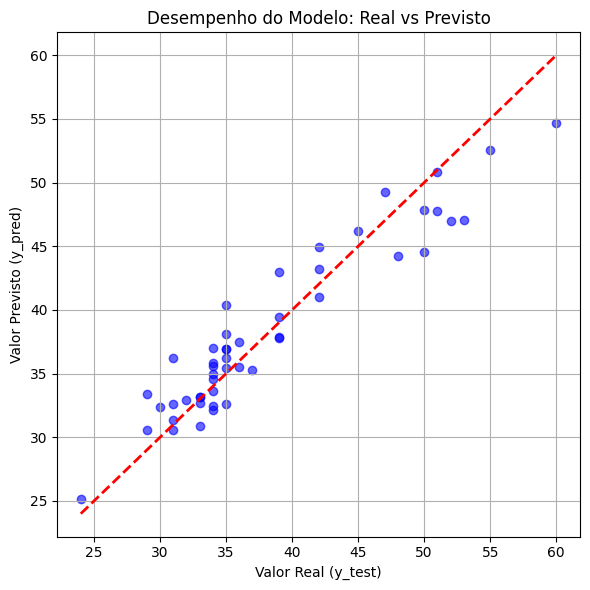

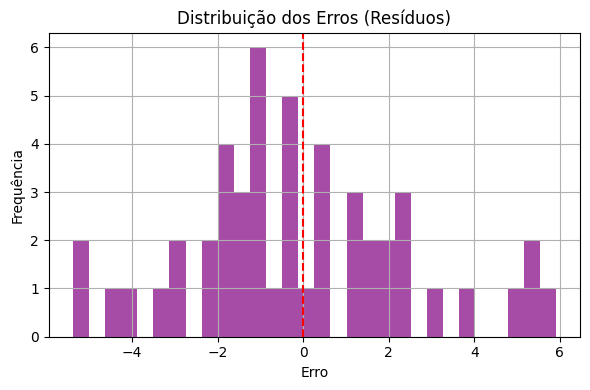

In [ ]:
# Análise do desempenho do modelo

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real (y_test)')
plt.ylabel('Valor Previsto (y_pred)')
plt.title('Desempenho do Modelo: Real vs Previsto')
plt.grid(True)
plt.tight_layout()
plt.show()


residuos = y_test - y_pred


plt.figure(figsize=(6, 4))
plt.hist(residuos, bins=30, color='purple', alpha=0.7)
plt.axvline(0, color='red', linestyle='--')
plt.title('Distribuição dos Erros (Resíduos)')
plt.xlabel('Erro')
plt.ylabel('Frequência')
plt.grid(True)
plt.tight_layout()
plt.show()


Gráfico de dispersão: valores reais vs. valores previstos
- Esse é mais direto para verificar se o modelo está acertando. Idealmente, os pontos devem ficar próximos de uma linha reta (linha y = x).

Histograma dos erros (resíduos)
- Mostra a distribuição dos erros. Idealmente, essa curva deve parecer com uma curva normal centrada em zero.